# NETFLIX Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Problem Statements

Q1. What is the most frequent genre of movies released on Netflix?<br>
Q2. Which has highest votes in vote avg column?<br>
Q3. What movie has got the highest popularity? What's its genre?<br>
Q4. What movie has got the lowest popularity? What's its genre?<br>
Q5. Which year has the most filmmed movies?

### Data collection

In [2]:
df = pd.read_csv("mymoviedb.csv", lineterminator="\n")

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### Data Cleaning

#### Removing NaNs

In [6]:
pd.notnull(df)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
9822,True,True,True,True,True,True,True,True,True
9823,True,True,True,True,True,True,True,True,True
9824,True,True,True,True,True,True,True,True,True
9825,True,True,True,True,True,True,True,True,True


In [7]:
df.dropna()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


The above dataset has no NaN values

#### Removing Duplicates

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [9]:
df.drop_duplicates(keep='first')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


The above dataset has no duplicate rows

#### Removing unwanted columns

Columns like 'Overview', 'Original_Language' and 'Poster_Url' are not required for Data Analysis

In [10]:
df = df.drop(labels=['Overview', 'Original_Language', 'Poster_Url'], axis=1)

In [11]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#### Changing the type of data in 'Release_Date' column

'2021-12-15' is inefficient for data analysis. So it is changed to '2021' only.

In [12]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']).dt.year.astype(int)

In [13]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#### Problem in Genre

The above dataset is required for some task

In [14]:
df2 = df.copy()

The genres are comma-separated. We need to separate all the genres in different rows.

In [15]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')

In [16]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
1,2022,The Batman,3827.658,1151,8.1,Crime
1,2022,The Batman,3827.658,1151,8.1,Mystery
...,...,...,...,...,...,...
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
9826,1984,Threads,13.354,186,7.8,War
9826,1984,Threads,13.354,186,7.8,Drama


### Final Data for Analysis

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
1,2022,The Batman,3827.658,1151,8.1,Crime
1,2022,The Batman,3827.658,1151,8.1,Mystery


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25793 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  25793 non-null  int64  
 1   Title         25793 non-null  object 
 2   Popularity    25793 non-null  float64
 3   Vote_Count    25793 non-null  int64  
 4   Vote_Average  25793 non-null  float64
 5   Genre         25793 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.4+ MB


### Data Analysis

What is the most frequent genre of movies released on Netflix?

In [19]:
df['Genre'].value_counts()

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

In [20]:
print(f"The most frequent genre of movies released on Netflix is: {df['Genre'].value_counts().idxmax()} ({df['Genre'].value_counts().max()})")

The most frequent genre of movies released on Netflix is: Drama (3744)


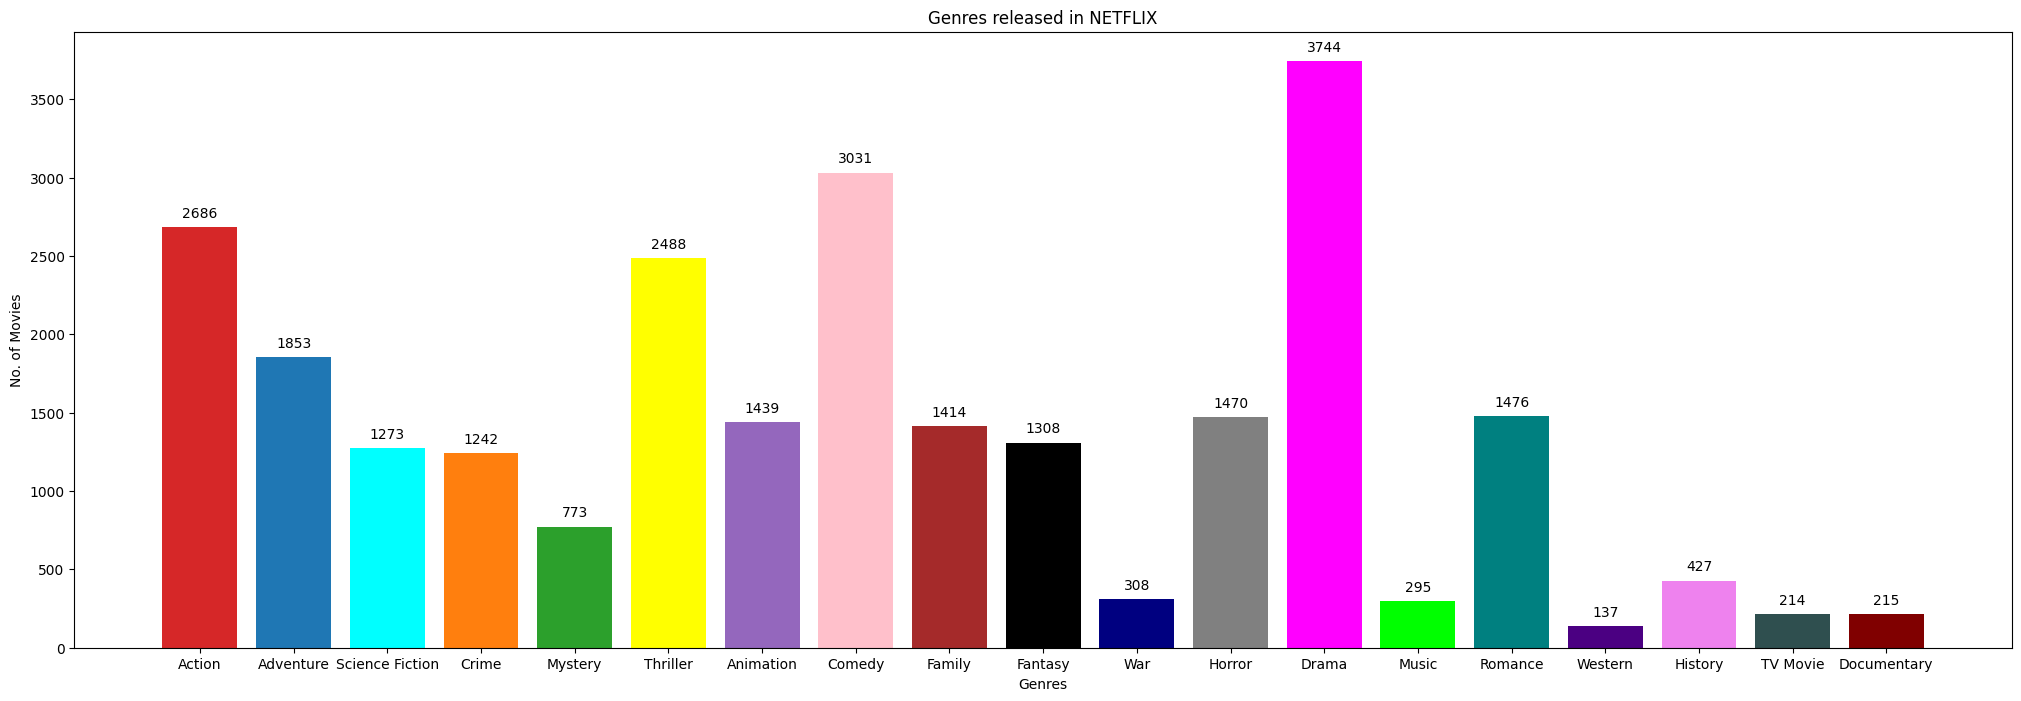

In [21]:
fig, ax = plt.subplots(figsize=(25, 8))

genre = pd.Series(df['Genre'].unique())
genre_count = pd.Series(df['Genre'].value_counts(sort=False))

bar_colors = ['tab:red', 'tab:blue', 'cyan', 'tab:orange', 'tab:green', 'yellow', 'tab:purple', 'pink', 'brown', 'black', 'navy', 'gray', 'magenta', 'lime', 'teal', 'indigo', 'violet', 'darkslategray', 'maroon']

bars = ax.bar(genre, genre_count, color=bar_colors)
ax.bar_label(bars, labels=genre_count, padding=5)

ax.set_xlabel('Genres')
ax.set_ylabel('No. of Movies')
ax.set_title('Genres released in NETFLIX')

plt.show()

Which has highest votes in vote avg column?

In [22]:
df2.loc[df2['Vote_Average'] == df2['Vote_Average'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9391,2020,Kung Fu Master Huo Yuanjia,13.745,1,10.0,"Action, Drama"


What movie has got the highest popularity? What's its genre?

In [23]:
df2.loc[df2['Popularity'] == df2['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"


What movie has got the lowest popularity? What's its genre?

In [24]:
df2.loc[df2['Popularity'] == df2['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"
9826,1984,Threads,13.354,186,7.8,"War, Drama, Science Fiction"


Which year has the most filmmed movies?

In [25]:

df2['Release_Date'].value_counts()

Release_Date
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1925      1
1902      1
1920      1
1929      1
1930      1
Name: count, Length: 102, dtype: int64

In [26]:
print(f"{df2['Release_Date'].value_counts().idxmax()} is the most filmmed year in Netflix with {df2['Release_Date'].value_counts().max()} films")

2021 is the most filmmed year in Netflix with 714 films


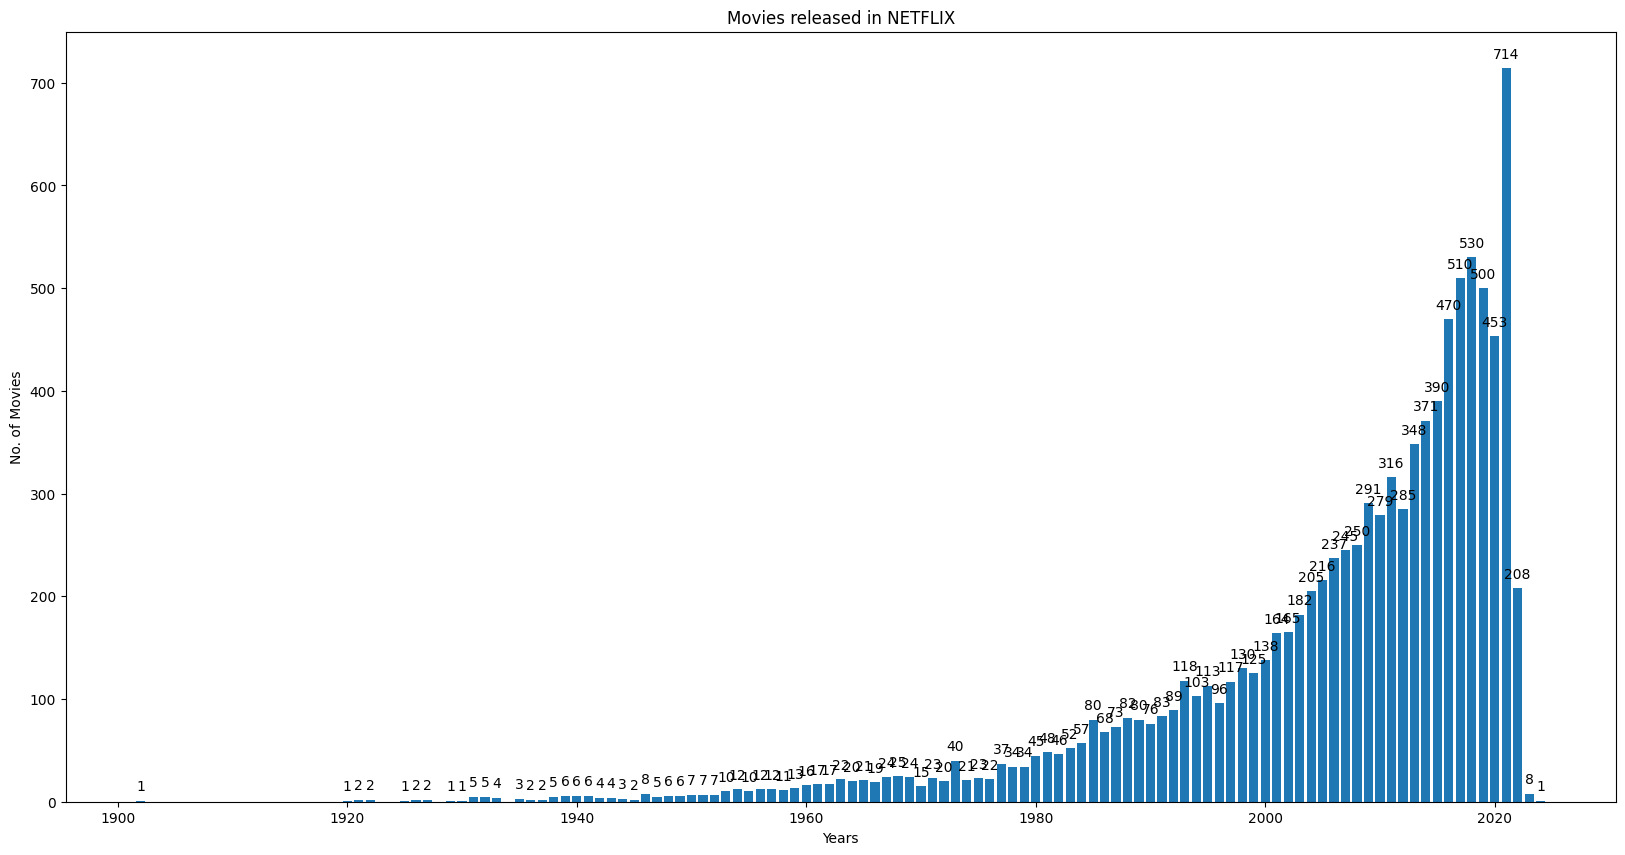

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))

years = pd.Series(df2['Release_Date'].unique())
movie_count = pd.Series(df2['Release_Date'].value_counts(sort=False))

bars = ax.bar(years, movie_count)
ax.bar_label(bars, labels=movie_count, padding=5)

ax.set_xlabel('Years')
ax.set_ylabel('No. of Movies')
ax.set_title('Movies released in NETFLIX')

plt.show()

#### Decade-Wise Movie Count in Netflix

In [28]:
bins = list(range(1900, 2031, 10))
labels = [f"{start}-{start+9}" for start in bins[:-1]]

series1 = pd.Series(labels, name='Time_Periods')

counts = pd.cut(df2['Release_Date'], bins=bins, labels=labels, include_lowest=True, right=False).value_counts().sort_index()
series2 = pd.Series(counts.values, index=labels, name='Movie_Count')

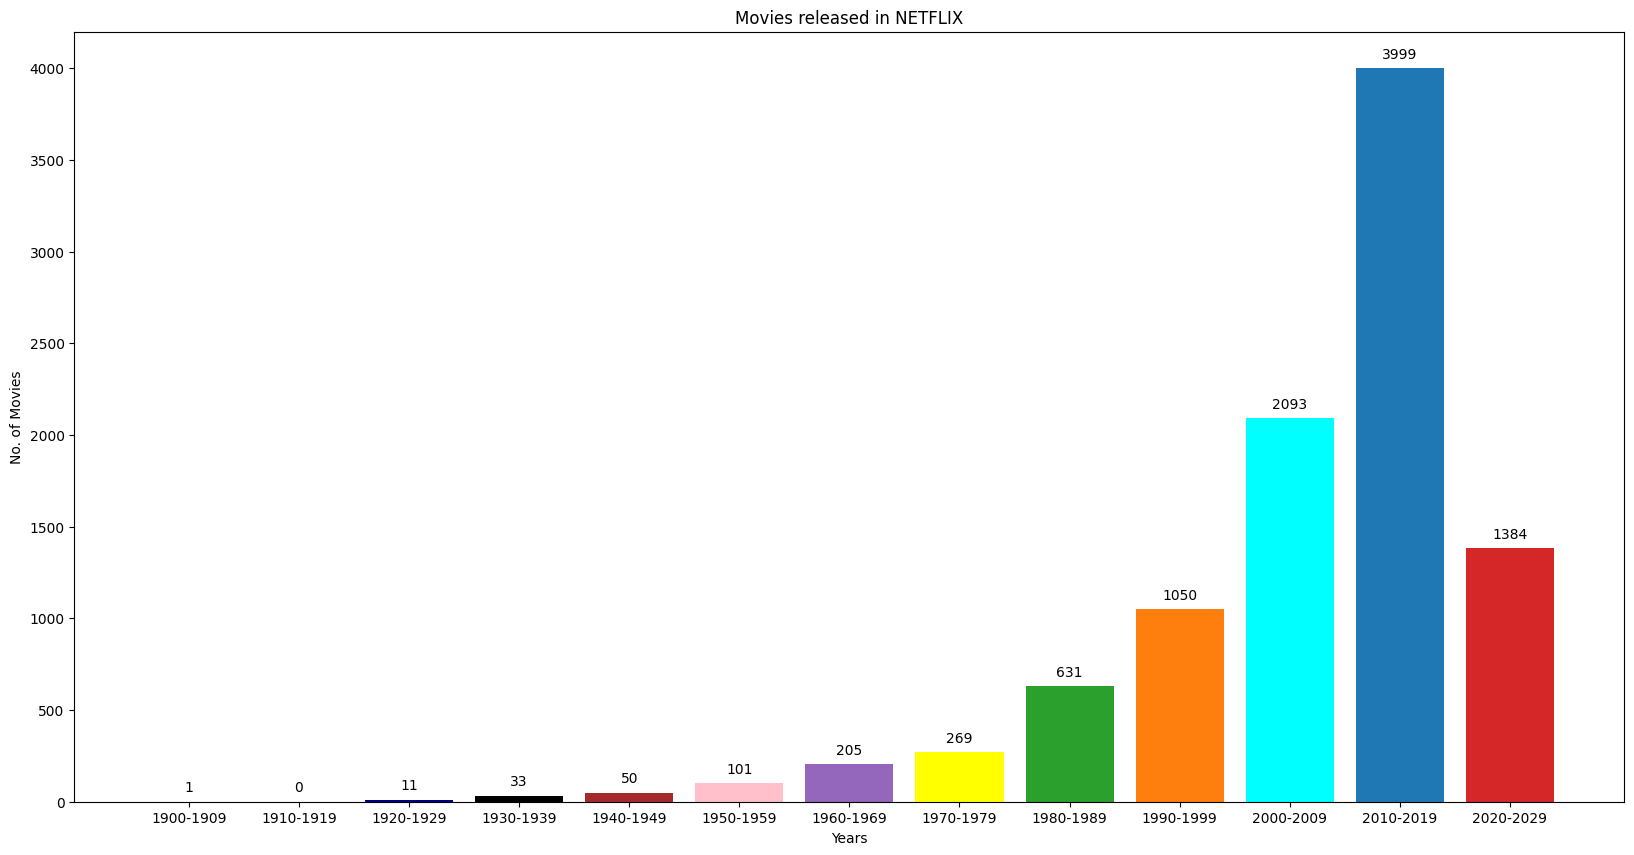

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
bar_colors = ['tab:red', 'tab:blue', 'cyan', 'tab:orange', 'tab:green', 'yellow', 'tab:purple', 'pink', 'brown', 'black', 'navy', 'gray', 'magenta'][::-1]


bars = ax.bar(series1, series2, color=bar_colors)
ax.bar_label(bars, labels=series2, padding=5)

ax.set_xlabel('Years')
ax.set_ylabel('No. of Movies')
ax.set_title('Movies released in NETFLIX')

plt.show()

# CONCLUSION

### Q1. What is the most frequent genre of movies released on Netflix?

In the given dataset, the most frequent genre of movies that released on Netflix is <b>Drama</b> with <b>3744 movies.</b>

### Q2. Which has highest votes in vote avg column?

<b>Kung Fu Master Huo Yuanjia</b>, released on <b>09 April 2020</b>, has the highest votes, i.e., <b>10.0</b>,  in `Vote_Average` column

### Q3. What movie has got the highest popularity? What's its genre?

<b>Spider-Man: No Way Home</b>, released on <b>15 December 2021</b>, is a <i>Action, Adventure, Science Fiction</i> movie, which is the most popular movie in Netflix.

### Q4. What movie has got the lowest popularity? What's its genre?

There are <b>two</b> movies which got the lowest popularity in Netflix:-
<ol>
<li><b>The United States vs. Billie Holiday</b>, released on <b>31 March 2021</b></li>
<li><b>Threads</b>, released on <b>23 September 1984</b></li>
</ol> 

### Q5. Which year has the most filmmed movies?

In <b>2021</b>, <b>714 movies</b> got released on Netflix, making it the most filmmed year.